In [5]:
import radarsimpy

print("`RadarSimPy` used in this example is version: " + str(radarsimpy.__version__))

`RadarSimPy` used in this example is version: 12.4.0


# RCS of a plane

In [6]:
import pymeshlab
import numpy as np

target = {
    "model": "/home/hawk/GitDir/PX4-gazebo-models/models/x500_base/x500_base.stl",
    "unit": "m",
    "location": (0, 0, 0),
}

_Plot the model_


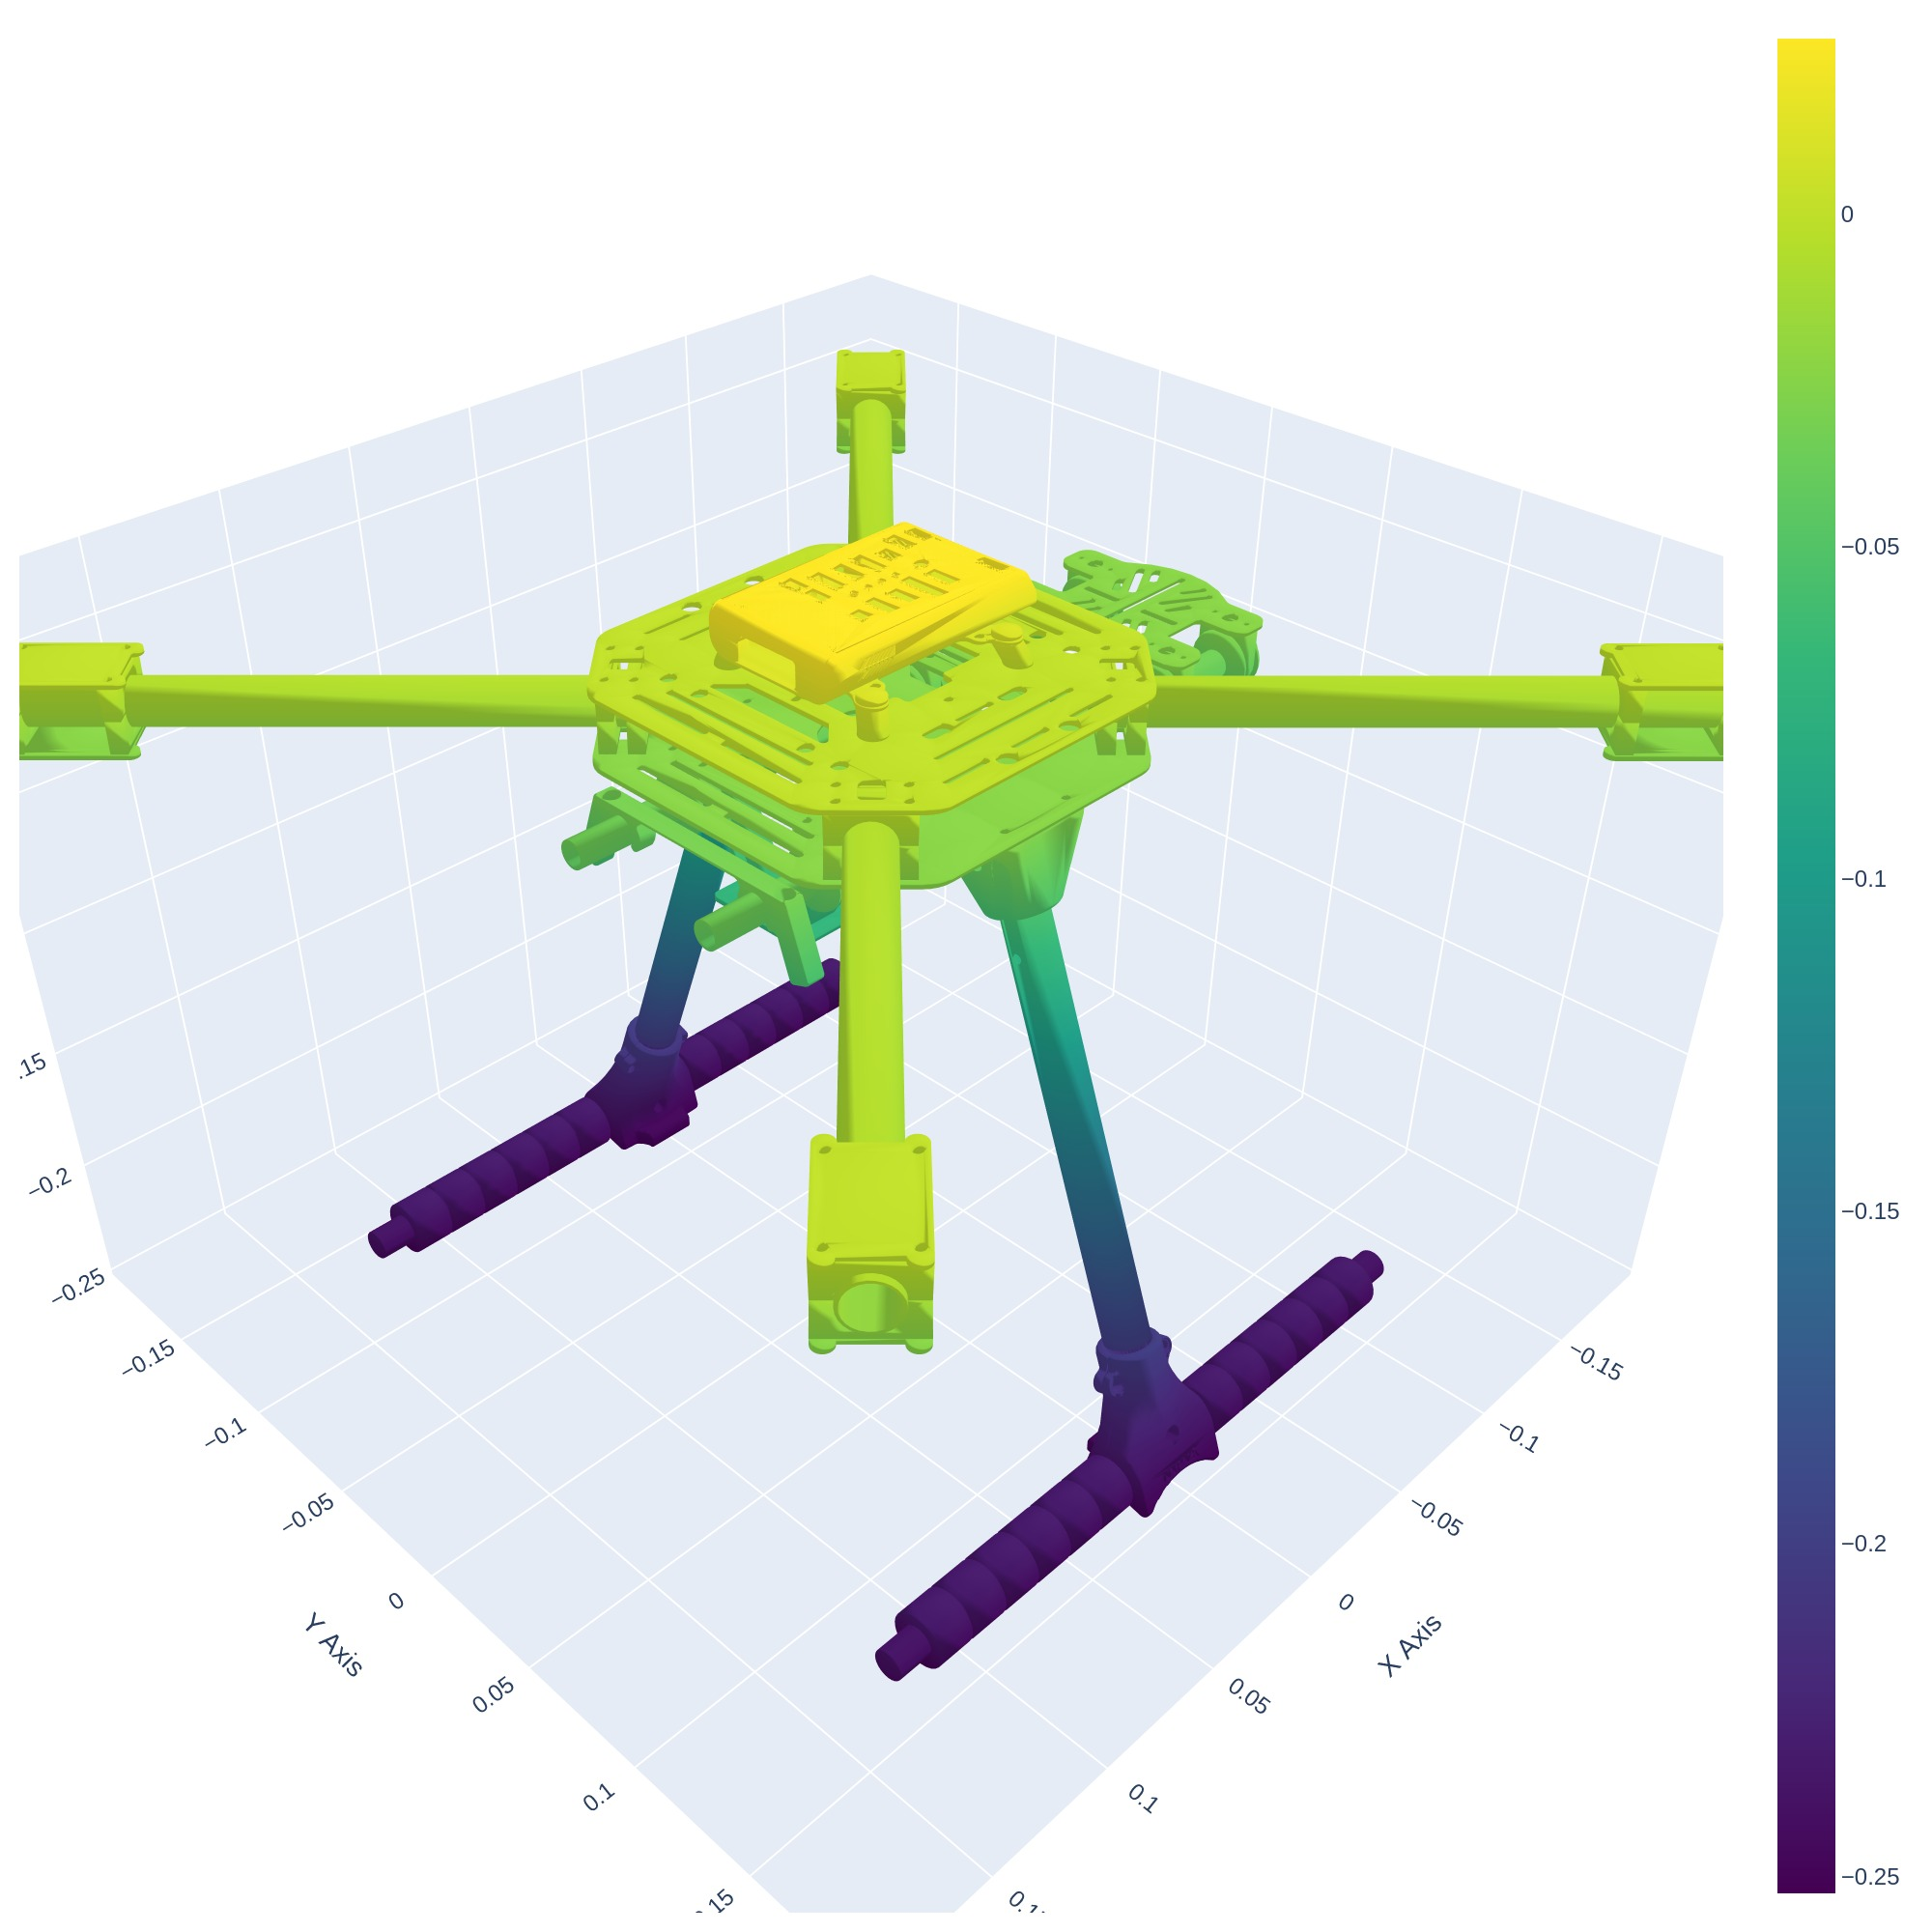

In [7]:
import plotly.graph_objs as go

# Load the mesh data
ms = pymeshlab.MeshSet()
ms.load_new_mesh(target["model"])
t_mesh = ms.current_mesh()
v_matrix = np.array(t_mesh.vertex_matrix())
f_matrix = np.array(t_mesh.face_matrix())

# Compute dynamic ranges for the axes
x_range = [v_matrix[:, 0].min(), v_matrix[:, 0].max()]
y_range = [v_matrix[:, 1].min(), v_matrix[:, 1].max()]
z_range = [v_matrix[:, 2].min(), v_matrix[:, 2].max()]

# Create a 3D plot
fig = go.Figure()

fig.add_trace(
    go.Mesh3d(
        x=v_matrix[:, 0],
        y=v_matrix[:, 1],
        z=v_matrix[:, 2],
        i=f_matrix[:, 0],
        j=f_matrix[:, 1],
        k=f_matrix[:, 2],
        intensity=v_matrix[:, 2],
        colorscale="Viridis",
    )
)

# Update layout for 3D visualization
fig.update_layout(
    scene=dict(
        xaxis=dict(range=x_range, title="X Axis"),
        yaxis=dict(range=y_range, title="Y Axis"),
        zaxis=dict(range=z_range, title="Z Axis"),
        aspectmode="data",  # Maintain data aspect ratio
        camera=dict(eye=dict(x=1.5, y=1.5, z=1.5)),  # Adjust camera perspective
    ),
    width=800,  # Moderate figure width
    height=800,  # Moderate figure height
    margin=dict(l=10, r=10, t=10, b=10),  # Minimize layout margins
    title="3D Mesh Visualization",
)

# Display the interactive 3D plot
fig.show()


## Simulate RCS vs Observation Angle


In [8]:
import time

from radarsimpy.rt import rcs_sbr

phi = np.arange(0, 180, 1)
theta = 90
freq = 76e9
pol = [0, 0, 1]
density = 0.1

rcs = np.zeros_like(phi)

tic = time.time()
for phi_idx, phi_ang in enumerate(phi):
    rcs[phi_idx] = 10 * np.log10(
        rcs_sbr([target], freq, phi_ang, theta, pol, density=density)
    )
toc = time.time()

print("Exec time :" + str(toc - tic) + "s")

Exception: You are presently utilizing RadarSimPy's FreeTier plan, which imposes a restriction on the maximum mesh size of a target to 32. Please consider supporting my work by upgrading to the standard version. Just choose any amount greater than zero on https://radarsimx.com/product/radarsimpy/ to access the standard version download links. Your support will help improve the software. Thank you for considering it.

_Plot RCS vs angle_


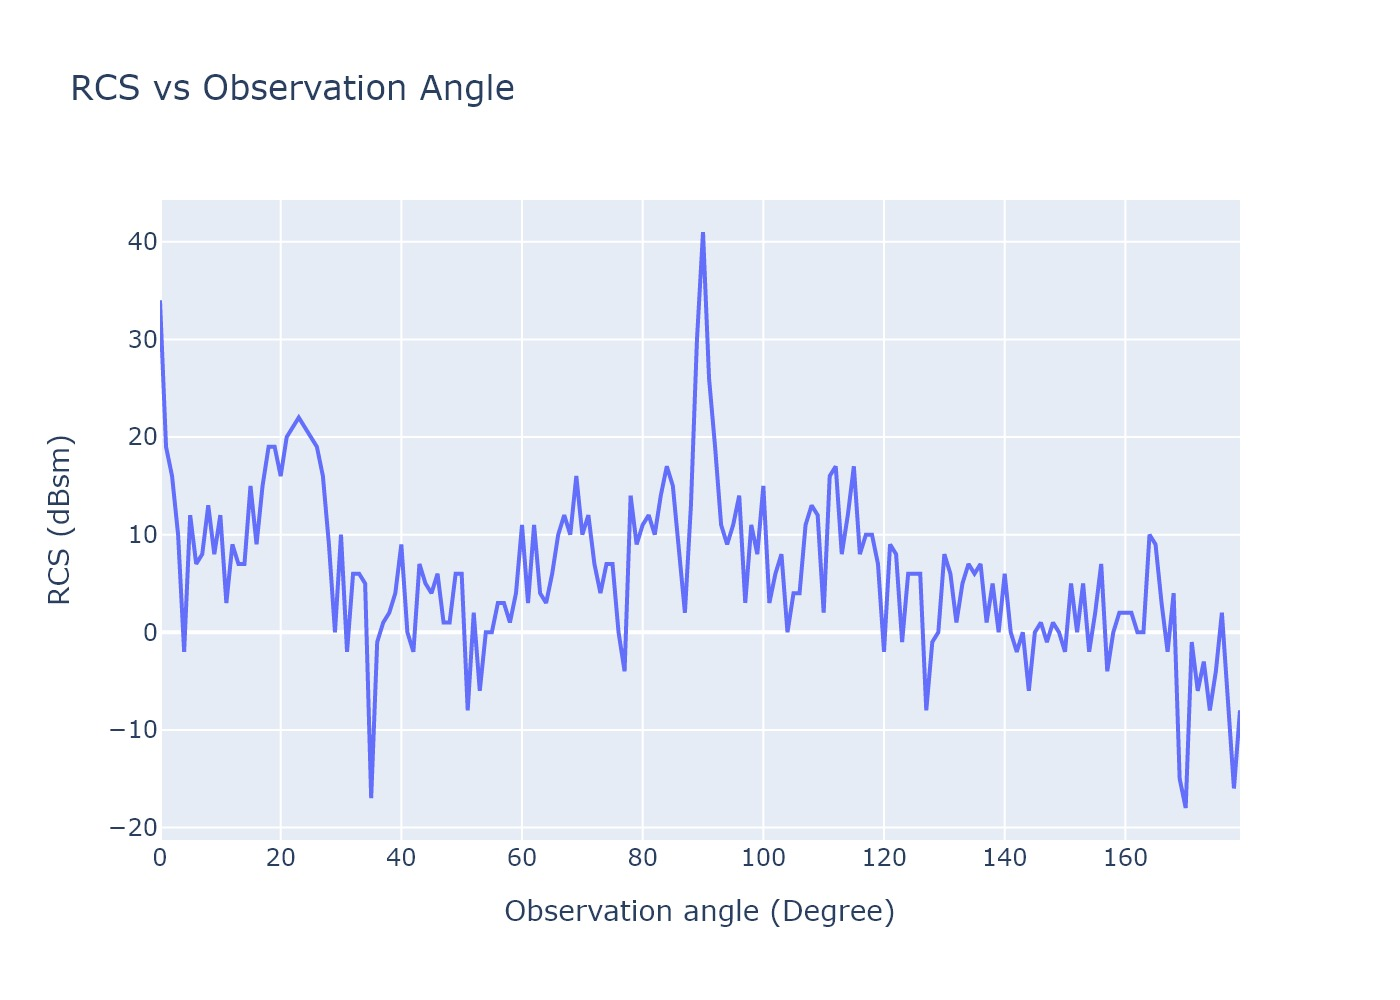

In [10]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=phi, y=rcs))

fig.update_layout(
    title="RCS vs Observation Angle",
    yaxis=dict(title="RCS (dBsm)"),
    xaxis=dict(title="Observation angle (Degree)", dtick=20),
)

# uncomment this to display interactive plot
# fig.show()

# display static image to reduce size on radarsimx.com
img_bytes = fig.to_image(format="jpg", scale=2)
display(Image(img_bytes))